# 이미지 설명 요청하기

## 인터넷에 있는 이미지 사진 설명 요청하기
- 원하는 이미지 링크 사용
- 단, API 호출을 통해 서버에 접근 가능한 이미지 링크를 사용하기
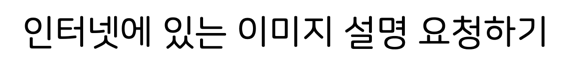

In [1]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPEN_API_KEY")  # 환경 변수에서 API 키를 가져오기

client = OpenAI(api_key=api_key)  # 오픈AI 클라이언트의 인스턴스 생성

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": "https://recipe1.ezmember.co.kr/cache/recipe/2016/06/05/1ba7e34cf0daf694f09a3a9539ebdb161.jpg",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response


ChatCompletion(id='chatcmpl-CQPBZUAnlGfDQSAuKaoSwQYrcJs1U', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 이미지는 오므라이스를 담은 접시를 보여줍니다. 오므라이스는 얇게 부친 달걀로 볶음밥을 감싼 요리로, 위에 케첩이 뿌려져 있습니다. 옆에는 브로콜리와 케첩, 얇게 썬 과일이 함께 놓여 있습니다. 밥 안에는 햄과 야채가 포함되어 있습니다. 맛있고 간편한 한 끼 식사로 보입니다.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, annotations=[]))], created=1760409377, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_cbf1785567', usage=CompletionUsage(completion_tokens=114, prompt_tokens=779, total_tokens=893, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

## 내가 가진 이미지로 설명 요청하기

### base64 인코딩
- 바이너리 데이터 HTTP Request 전송을 위해 인코딩 진행

In [5]:
import base64

# Function to encode the image
def encode_image(path):
    with open(path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
image_path = r"C:\Users\kim\llm-programming\ch6\mart.jpg"

# 이미지를 base64로 인코딩
base64_image = encode_image(image_path)

print(base64_image[0:100])

/9j/4AAUSkZJRgABAQEBLAEsAABBTVBG/+EJxEV4aWYAAE1NACoAAAAIAA0BDwACAAAABgAAAKoBEAACAAAACgAAALABEgADAAAA


### GPT API 호출 및 결과 출력

In [6]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'이 이미지는 아시아 식품 매장의 한 코너를 보여주고 있습니다. 선반에는 컵라면과 봉지라면이 가지런히 진열되어 있으며, 주로 태국의 인스턴트 라면 제품들로 보입니다. 컵라면 용기는 분홍색과 빨간색으로 디자인되어 있습니다. 선반 아래에는 쌀국수로 보이는 제품들이 포장되어 놓여 있습니다. 전반적으로 다양한 종류의 아시아 라면 제품이 진열되어 있는 모습입니다.'

### 여러 이미지 비교 분석 요청

In [7]:
red_dumpling_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\quiz\dumpling.jpg")
dumpling_soup_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\quiz\dumpling_soup.jpeg")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "두 음식의 차이점을 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{red_dumpling_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{dumpling_soup_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'첫 번째 사진과 두 번째 사진의 음식은 모두 만두와 관련된 요리입니다. 다음은 두 음식의 주요 차이점입니다:\n\n1. **조리 과정 및 방식**:\n   - 첫 번째 사진은 주방에서 만두를 만들고 찜기에 넣는 과정을 보여줍니다. 이는 전형적으로 찐만두(예: 샤오롱바오)를 만드는 모습입니다.\n   - 두 번째 사진은 만두가 국물에 담겨 있는 형태로, 이는 보통 물만두 또는 국물 만두로 불립니다.\n\n2. **서빙 방식**:\n   - 찐만두는 보통 찜기에서 바로 접시에 담아 따뜻하게 서빙되며, 간장이나 식초를 곁들여 먹습니다.\n   - 국물 만두는 국물과 함께 그릇에 담겨 제공되며, 보통 숟가락으로 국물과 함께 먹습니다.\n\n3. **맛과 식감**:\n   - 찐만두는 더 쫀득하고 내외부의 식감이 확연히 구분됩니다.\n   - 국물 만두는 국물 덕분에 더 촉촉하며, 국물의 맛도 함께 느낄 수 있습니다.\n\n각각의 방법은 다른 요리 경험을 제공하며, 개인의 취향에 따라 선택하시면 됩니다.'

## GPT 비전의 한계 알아보기

In [ ]:
oecd_rnd_2021_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\oecd_rnd_2021_large.png")
oecd_rnd_2022_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\oecd_rnd_2022_large.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫번째는 2021년 데이터이고, 두번째는 2022년 데이터입니다. 이 데이터에 대해 설명해주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content


'이 데이터를 통해 2021년과 2022년 사이의 연구개발비(R&D)와 GDP 대비 연구개발비 비중의 변화를 살펴볼 수 있습니다. 여기서는 한국을 중심으로 설명하겠습니다.\n\n1. **연구개발비**:\n   - **2021년**: 한국의 연구개발비는 약 89,282백만 US달러입니다.\n   - **2022년**: 한국의 연구개발비는 약 91,013백만 US달러로 증가하였습니다.\n\n2. **GDP 대비 연구개발비 비중**:\n   - **2021년**: 한국의 비중은 4.93%입니다.\n   - **2022년**: 한국의 비중은 4.93%에서 5.21%로 증가했습니다.\n\n이를 통해 한국은 경제 성장과 맞물려 연구개발에 대한 투자를 늘리고 있으며, GDP 대비 연구개발비 비중도 증가하고 있습니다. 이는 한국이 지속적으로 연구와 개발에 중점을 두고 있다는 것을 나타냅니다. 다른 국가의 경우도 대체로 소폭의 변화가 있으며, 한국의 비중은 여전히 높은 수준을 유지하고 있습니다.'

In [ ]:
oecd_rnd_2021_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\oecd_rnd_2021_medium.png")
oecd_rnd_2022_base64 = encode_image(r"C:\Users\kim\llm-programming\ch6\oecd_rnd_2022.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫번째는 2021년 데이터이고, 두번째는 2022년 데이터입니다. 이 데이터에 대해 설명해주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",  # 응답 생성에 사용할 모델 지정
    messages=messages # 대화 기록을 입력으로 전달
)

response.choices[0].message.content

'이 두 데이터는 각국의 연구개발비와 GDP 대비 연구개발비 비중을 보여주고 있습니다. 한국에 대한 변화는 다음과 같습니다:\n\n1. **연구개발비(백만 US달러):**\n   - 2021년 데이터: 121,739백만 US달러\n   - 2022년 데이터: 133,867백만 US달러\n   - **변화:** 한국의 연구개발비는 증가했습니다.\n\n2. **GDP 대비 연구개발비 비중(%):**\n   - 2021년: 4.93%\n   - 2022년: 4.93%\n   - **변화:** 비중에는 큰 변화가 없습니다.\n\n3. **일반적인 경향:**\n   - 전체적으로 연구개발비가 증가한 것을 볼 수 있으며, 한국은 여전히 높은 수준을 유지하고 있습니다. 한국의 연구개발 지출은 여전히 GDP의 큰 비중을 차지합니다.\n\n이 데이터는 한국이 지속적으로 연구개발에 집중하고 있으며, 이러한 투자를 통해 기술 혁신과 성장을 추구하는 것을 보여줍니다.'